# Assignment 3: Linear Regression

Only use the already imported library `numpy` and the Python standard library. Make sure that the datasets `dataLinReg2D.txt`, `dataQuadReg2D.txt`, `dataQuadReg2D_noisy.txt` and `airfoil_self_noise.dat` are in the same directory as the notebook.

List your team members (name and immatriculation number) and indicate whether you are a B.Sc. Data Science or other group in the following cell:

Kuang-Yu Li, st169971@stud.uni-stuttgart.de, 3440829
Ya-Jen Hsu, st169013@stud.uni-stuttgart.de, 3449448
Gabriella Ilena, st169935@stud.uni-stuttgart.de, 3440942

## Task 1: Ridge Regression for Polynomial 2D Functions

Each line in the data sets consists of a data entry `(x,y)` with a 2D point `x` and a 1D function output `y`.

In [38]:
# Load required packages and datasets. Do not modify.
import numpy as np

def load_dataset(path):
    data = np.loadtxt(path)
    X, y = data[:, :2], data[:, 2]
    
    return X, y
    

X_lin, y_lin = load_dataset("dataLinReg2D.txt")
X_quad, y_quad = load_dataset("dataQuadReg2D.txt")
X_noise, y_noise = load_dataset("dataQuadReg2D_noisy.txt")

1) Extend the `make_features` method to also compute quadratic features (`ftype = 'quad'`). You may also experiment with other feature transformations, e.g. third-order polynomials.

In [39]:
def make_features(X, ftype='lin'):
    n,d = X.shape
    
    if ftype == 'lin': # Linear feature transformation (including intercept)
        Phi = np.empty((n, d+1))
        Phi[:, 0] = 1
        Phi[:, 1:] = X
        
    elif ftype == 'quad':  # Quadratic feature transformation
        # Implement for task 1.1.
        # Transform the features into quadratic form
        # Array contains rows of the form: [1. x1 x2 x1^2 x1x2 x2^2]
        col = int(d+1+d*(d+1)/2)
        Phi = np.empty((n, col))
        Phi[:, 0] = 1 # Intercept
        Phi[:, 1:3] = X
        Phi[:, 3] = X[:, 0]**2
        Phi[:, 4] = X[:, 0] * X[:, 1]
        Phi[:, 5 ] = X[:, 1]**2
    
    elif ftype == 'nasa':
        # Implement for task 2.2.
        pass
    
    else:
        raise Exception('Feature type {} not implemented yet'.format(ftype))
    
    return Phi

# A little testing, to be deleted soon
result = make_features(X_quad, 'quad')

2) Implement Ridge Regression to fit a polynomial function to the data sets with the regularization parameter `lambda_` and feature type `ftype`.

Fill out the methods in `RidgeRegression` to train (`fit`) and predict (`predict`). Feel free to introduce new fields and methods based on your needs, but the methods `fit` and `predict` are required and their interface should not be changed. You need to store the vector of regression coefficients in the field `self.beta`.

In [40]:
# Implement your solution here.
class RidgeRegression(object):
    def __init__(self, lambda_, ftype = 'lin'):
        self.lambda_ = lambda_
        self.ftype = ftype
        self.beta = None  # Learned regression coefficients.
    
    def fit(self, X, y):
        """
        X is an array of shape (n, d), 
            where n is the number of samples and d is the number of features.
        y is an array of shape (n,)
        """
        Phi = make_features(X, self.ftype)
        
        # Implement your solution here.
        XT = np.transpose(Phi)
        XTX = np.dot(XT, Phi)
        XTy = np.dot(XT, y)
        self.beta = np.linalg.solve(XTX+self.lambda_*np.eye(XTX.shape[0], dtype=float), XTy)
        # print(self.beta)
        pass
    
    def predict(self, X):
        """
        X is an array with shape (n, d).
        The method returns an array of shape (n,).
        """
        Phi = make_features(X, self.ftype)

        # Implement your solution here.
        return  np.dot(Phi,self.beta)

# test case
# y_test = [33, 12, 26], beta = [1, 3, 5]
RRTest = RidgeRegression(0)
X_train = np.array([[1,5], [3,1], [6,9]])
y_train = np.array([29, 15, 64])
X_test = np.array([[4,4], [2,1], [5,2]])
RRTest.fit(X_train, y_train)
# print(RRTest.predict(X_test))

3) Implement the function `MSE` to compute the mean squared error. `y_pred` and `y_true` are the vectors of predicted and true function outputs respectively with shape `(n,)`, where `n` is the number of samples. The function returns a single float.

In [41]:
def MSE(y_pred, y_true):
    # Implement your solution here.
    sum_err = 0.0

    for i in range(y_true.shape[0]):
        error = y_true[i] - y_pred[i]
        sum_err += error**2
    mse = sum_err / float(y_true.shape[0])

    return mse

# Test case
y_pred_test = np.array([2, 4, 8])
y_true_test = np.array([1.5, 3, 7])
mse_test = MSE(y_pred_test, y_true_test)
assert mse_test == 0.75, "In this case, mse_test should return 0.75"

4) Evaluate your Ridge Regression model with linear features on the linear `(X_lin, y_lin)` data set. Try to find a good `lambda_`. How does it perform with quadratic features on this data set? Report the MSE on the full data set when trained on the full data set. (Ideally, repeat this for different Ridge regularization parameters `lambda_` and generate a nice bar plot of the MSE for various `lambda_`.)

MSE with linear features:
[0.01024798 0.01024801 0.01025111 0.01055329 0.03463661]
MSE with quadratic features:
[0.00974548 0.00974552 0.00974935 0.01011905 0.03723485]


c:\users\michelle hsu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:40: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
c:\users\michelle hsu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:65: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
c:\users\michelle hsu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:65: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


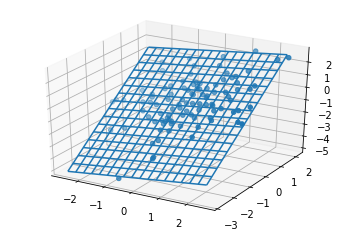

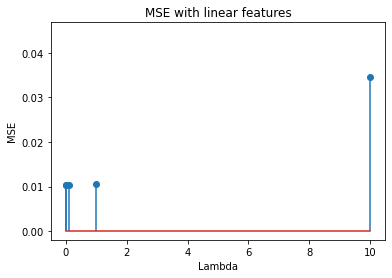

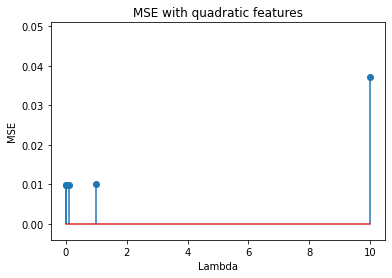

In [42]:
# Note: moved here from inside the plot_data_and_model function
# to also enable bar plot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

def train_evaluate(regression_model, X, y):
    regression_model.fit(X, y)
    yhat = regression_model.predict(X)
    # print('MSE:', MSE(yhat, y))
    return MSE(yhat, y)

    
def plot_data_and_model(regression_model, X, y):
    %matplotlib inline
    # Note: Changed from %matplotlib notebook to inline
    # The former didn't show the plot in PyCharm, need to confirm if this is ok
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection = '3d')
    ax.scatter(X[:, 0], X[:, 1], y, marker = 'o')
    
    xmin = X.min(0)
    xmax = X.max(0)

    x0grid, x1grid = np.mgrid[xmin[0]:xmax[0]:.3, xmin[1]:xmax[1]:.3]

    xdim0, xdim1 = np.shape(x0grid)
    xsize = np.size(x0grid)

    x0hat = x0grid.flatten()
    x1hat = x1grid.flatten()
    x0hat = x0hat.reshape((np.size(x0hat), 1))
    x1hat = x1hat.reshape((np.size(x1hat), 1))
    xhat = np.append(x0hat, x1hat, 1)
    xhatfv = make_features(xhat, regression_model.ftype)
    yhat = xhatfv.dot(regression_model.beta)
    ygrid = yhat.reshape((xdim0, xdim1))
    ax.plot_wireframe(x0grid, x1grid, ygrid)
    ax.auto_scale_xyz([xmin[0], xmax[0]], [xmin[1], xmax[1]], [y.min(), y.max()])
    fig.show()

def evaluate_lambda(lambda_, ftype, X, y):
    """
    This function returns the MSE from a range of lambda values
    """
    temp = []
    for i in lambda_:
        regression_type = RidgeRegression(i, ftype)
        temp.append(train_evaluate(regression_type, X, y))

    mse = np.array(temp)
    return mse

def bar_plot(lambda_, mse, title):
    # Create a bar plot with x = lambda, y = MSE
    fig2 = plt.figure()
    axb = fig2.add_subplot(111)
    axb.set_ylabel("MSE")
    axb.set_xlabel("Lambda")
    axb.set_title(title)
    ymin = mse.min()
    ymax = mse.max()
    axb.set_ylim([ymin-0.5*(ymax-ymin),ymax+0.5*(ymax-ymin)])
    axb.stem(lambda_, mse, use_line_collection=True) # Changed to stem since input lambda has a wide range
    fig2.show()

# Implement your solution here.
lambda_ = np.array([0.001, 0.01, 0.1, 1, 10])
mse_lin= evaluate_lambda(lambda_, 'lin', X_lin, y_lin)
mse_lin_quad= evaluate_lambda(lambda_, 'quad', X_lin, y_lin)
print("MSE with linear features:")
print(mse_lin)
print("MSE with quadratic features:")
print(mse_lin_quad)

# If the plot doesn't show the first time, run this cell again
# Choosing the best lambda value
regression_lin = RidgeRegression(lambda_=0.1, ftype='lin')
train_evaluate(regression_lin, X_lin, y_lin)
plot_data_and_model(regression_lin, X_lin, y_lin)

# Create a bar plot with x = lambda, y = MSE
bar_plot(lambda_, mse_lin, "MSE with linear features")
bar_plot(lambda_, mse_lin_quad, "MSE with quadratic features")

==> Using both linear feature and quadratic feature, we can observe that the MSE is both small and similar. This is because  the dataset {X_lin, y_lin} has linear feature and linear feature is a subset of quadratic feature. Therefore, quadratic feature is also suitable for this dataset.
The reason that MSE increase while lambda increase is that lambda represent the simplicity of the model and MSE represent the error. In addition, we use the whole dataset instead of splitting it. That's why the simpler the model is, the greater the MSE is.

5) Try to find a good model (including features and suitable `lambda_` parameters) for the quadratic data set `(X_quad, y_quad)`. Report the MSE on the full data set when trained on the full data set.  (Ideally, repeat this for different Ridge regularization parameters `lambda_` and generate a nice bar plot of the MSE for various `lambda_`.) Also plot your predicted model using the method above `plot_data_and_model`.

MSE with linear features:
[12.23624996 12.23625012 12.23626585 12.23781112 12.36805034]
MSE with quadratic feature:
[0.01188281 0.01188283 0.01188515 0.01211332 0.03189034]


c:\users\michelle hsu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:40: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
c:\users\michelle hsu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:65: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
c:\users\michelle hsu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:65: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


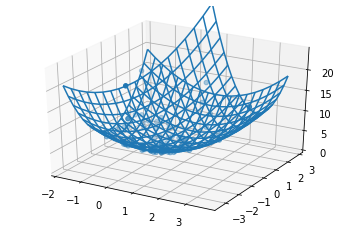

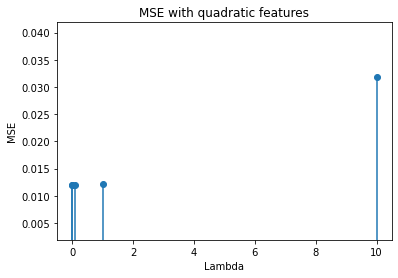

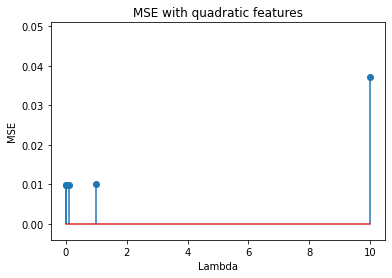

In [43]:
# Implement your model tests here using the quadratic data set
lambda_ = np.array([0.001, 0.01, 0.1, 1, 10])
mse_lin= evaluate_lambda(lambda_, 'lin', X_quad, y_quad)
mse_quad = evaluate_lambda(lambda_, 'quad', X_quad, y_quad)
print("MSE with linear features:")
print(mse_lin)
print("MSE with quadratic feature:")
print(mse_quad)

# If the plot doesn't show the first time, run this cell again
# Choosing the best lambda value and model
regression_quad = RidgeRegression(lambda_=0.1, ftype='quad')
train_evaluate(regression_quad, X_quad, y_quad)
plot_data_and_model(regression_quad, X_quad, y_quad)

# Create a bar plot with x = lambda, y = MSE
bar_plot(lambda_, mse_quad, "MSE with quadratic features")
bar_plot(lambda_, mse_lin_quad, "MSE with quadratic features")

==> We apply not only quadratic feature but also linear feature to the dataset. The result shows that MSE from linear feature is obviously greater than quadratic feature. This is because the dataset {X_quad, y_quad} has quadratic feature and the linear model is not enough for it which cause greater MSE. In this situation, MSE also increase while lambda increase.

6) Try to find a good model (including features and suitable `lambda_` parameters) for the noisy data set `(X_noise, y_noise)`. Report the MSE on the full data set when trained on the full data set.  (Ideally, repeat this for different Ridge regularization parameters `lambda_` and generate a nice bar plot of the MSE for various `lambda_`.) Also plot your predicted model using the method above `plot_data_and_model`.

MSE with linear features:
[39.95522635 39.95522665 39.9552557  39.95805553 40.15853707]
MSE with quadratic features:
[28.05781177 28.05781219 28.05785417 28.061784   28.29316757]


c:\users\michelle hsu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:40: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
c:\users\michelle hsu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:65: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
c:\users\michelle hsu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:65: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


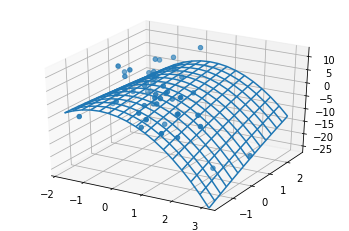

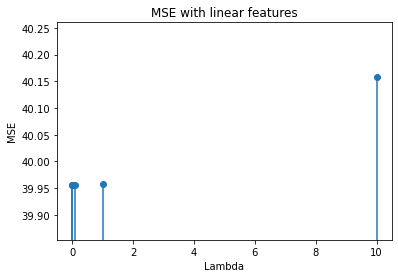

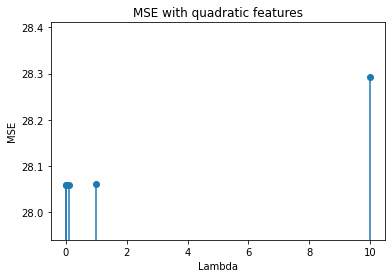

In [44]:
# Implement your model tests here using the noisy data set
lambda_ = np.array([0.001, 0.01, 0.1, 1, 10])
mse_noise1 = evaluate_lambda(lambda_, 'lin', X_noise, y_noise)
mse_noise2 = evaluate_lambda(lambda_, 'quad', X_noise, y_noise)

print("MSE with linear features:")
print(mse_noise1)
print("MSE with quadratic features:")
print(mse_noise2)

# If the plot doesn't show the first time, run this cell again
# Choosing the best lambda value and model
regression_noise = RidgeRegression(lambda_=0.1, ftype='quad')
train_evaluate(regression_noise, X_noise, y_noise)
plot_data_and_model(regression_noise, X_noise, y_noise)

# Create a bar plot with x = lambda, y = MSE
bar_plot(lambda_, mse_noise1, "MSE with linear features")
bar_plot(lambda_, mse_noise2, "MSE with quadratic features")

==> For the noisy dataset, applying both feature cause both large MSE. This is because this dataset {X_noise, y_noise} has neither linear feature nor quadratic feature.

## Task 2: Airfoil Self-Noise Prediction

The air self-noise dataset is a [dataset by NASA](https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise). Your task is to find a good feature mapping for ridge regression to achieve the lowest possible prediction error.

1) Explain the content of the dataset in few words. What are the input features? What is the output?

==> *Write your response here* (double klick here to edit)

In [45]:
def load_dataset(path):
    data = np.genfromtxt(path)
    X, y = data[:, :5], data[:, 5]
    
    return X, y
    

X, y = load_dataset('airfoil_self_noise.csv')

2) Implement the option `ftype = 'nasa'` in the `make_features` function. You should try any type of non-linear features and interactions between features. You are not restricted to the feature mapping presented in the lecture. It is helpful to think about the domain and characteristics of the features, e.g. how do you work with periodic features. In this situation, MSE also increase while lambda increase.

Explain the choice of your features:

==> *Briefly explain your chosen features.* (double klick here to edit)

3) Evaluate your Ridge Regression model with your chosen features on the data set. Try to find a good `lambda_`. Report the MSE on the full data set when trained on the full data set. (Ideally, repeat this for different Ridge regularization parameters `lambda_` and generate a nice bar plot of the MSE for various `lambda_`.)

In [46]:
def train_evaluate(regression_model, X, y):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020)
    
    regression_model.fit(X_train, y_train)
    yhat_test = regression_model.predict(X_test)
    print('MSE:', MSE(yhat_test, y_test))

your_regression = RidgeRegression(lambda_=0.1, ftype='nasa')
train_evaluate(your_regression, X, y)

ModuleNotFoundError: No module named 'sklearn'

==> *Write your observations here and report your results.* (double klick here to edit)

**For all students other than B.Sc. Data Science:**

4) Implement the function `cross_validation` to evaluate the prediction error of your model. Report the mean squared error from cross-validation. (Ideally, repeat this for different Ridge regularization parameters `lambda_` and generate a nice bar plot of the MSE for various `lambda_`.)

In [ ]:
def cross_validation(regression_model, X, y):
    pass

your_regression = RidgeRegression(lambda_=0.1, , ftype='nasa')
cross_validation(your_regression, X, y)

==> *Write your observations here and report your results.* (double klick here to edit)